In [4]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install transformers datasets evaluate rouge-score numpy pandas

import time
import numpy as np
import pandas as pd
from transformers import pipeline
from evaluate import load




Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=f6629fcd4f36f89d4fe6d41482a5b16e7deeb662aee4f56548926ed7c5e0f3db
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dep

In [5]:
text = """The COVID-19 pandemic led to an unprecedented shift in the global economy.
Many businesses had to close, and millions of people lost their jobs.
Governments worldwide implemented stimulus packages to mitigate the impact.
As vaccines rolled out, economies began to recover, but inflation remains a concern."""

# List of pre-trained text summarization models
models = [
    "facebook/bart-large-cnn",
    "t5-small",
    "t5-base",
    "google/pegasus-xsum"
]

# Load ROUGE metric for evaluation
rouge = load("rouge")

# Dictionary to store results
evaluation_results = []

# Iterate through each model, generate summary, and evaluate
for model_name in models:
    print(f"\nEvaluating {model_name}...")

    # Load summarization pipeline
    summarizer = pipeline("summarization", model=model_name)

    # Measure inference time
    start_time = time.time()
    summary = summarizer(text, max_length=50, min_length=20, do_sample=False)
    end_time = time.time()

    generated_summary = summary[0]['summary_text']

    # Compute ROUGE scores
    scores = rouge.compute(predictions=[generated_summary], references=[text])

    # Store evaluation metrics
    evaluation_results.append([
    model_name,
    scores['rouge1'],  # ✅ Now correctly accesses the score
    scores['rouge2'],
    scores['rougeL'],
    end_time - start_time  # Inference time
])

# Convert results to a Pandas DataFrame
df = pd.DataFrame(evaluation_results, columns=["Model", "ROUGE-1", "ROUGE-2", "ROUGE-L", "Inference Time"])
print("\nEvaluation Results:")
print(df)

# Save evaluation results to CSV (optional)
df.to_csv("summarization_model_evaluation.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Evaluating facebook/bart-large-cnn...


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu



Evaluating t5-small...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu



Evaluating t5-base...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu



Evaluating google/pegasus-xsum...


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu



Evaluation Results:
                     Model   ROUGE-1   ROUGE-2   ROUGE-L  Inference Time
0  facebook/bart-large-cnn  0.839506  0.835443  0.839506       20.089685
1                 t5-small  0.657143  0.617647  0.657143        2.045276
2                  t5-base  0.794872  0.736842  0.794872        7.149683
3      google/pegasus-xsum  0.125000  0.000000  0.093750       16.377924


In [10]:
from sklearn.preprocessing import MinMaxScaler
data = df.iloc[:, 1:].values

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Define ideal best (highest ROUGE, lowest inference time) and worst solutions
ideal_best = np.max(normalized_data, axis=0)
ideal_worst = np.min(normalized_data, axis=0)

# Compute Euclidean distances from best and worst
distance_best = np.linalg.norm(normalized_data - ideal_best, axis=1)
distance_worst = np.linalg.norm(normalized_data - ideal_worst, axis=1)

# Compute TOPSIS scores
topsis_score = distance_worst / (distance_best + distance_worst)

# Add TOPSIS score to DataFrame
df["TOPSIS Score"] = topsis_score

# Sort by TOPSIS score (higher is better)
df = df.sort_values(by="TOPSIS Score", ascending=False)

# Save ranked results
df.to_csv("topsis_ranking.csv", index=False)

print("\n Final Model Ranking (TOPSIS):\n")
print(df)



 Final Model Ranking (TOPSIS):

                     Model   ROUGE-1   ROUGE-2   ROUGE-L  Inference Time  \
0  facebook/bart-large-cnn  0.839506  0.835443  0.839506       20.089685   
2                  t5-base  0.794872  0.736842  0.794872        7.149683   
1                 t5-small  0.657143  0.617647  0.657143        2.045276   
3      google/pegasus-xsum  0.125000  0.000000  0.093750       16.377924   

   TOPSIS Score  
0      1.000000  
2      0.664996  
1      0.510694  
3      0.283188  


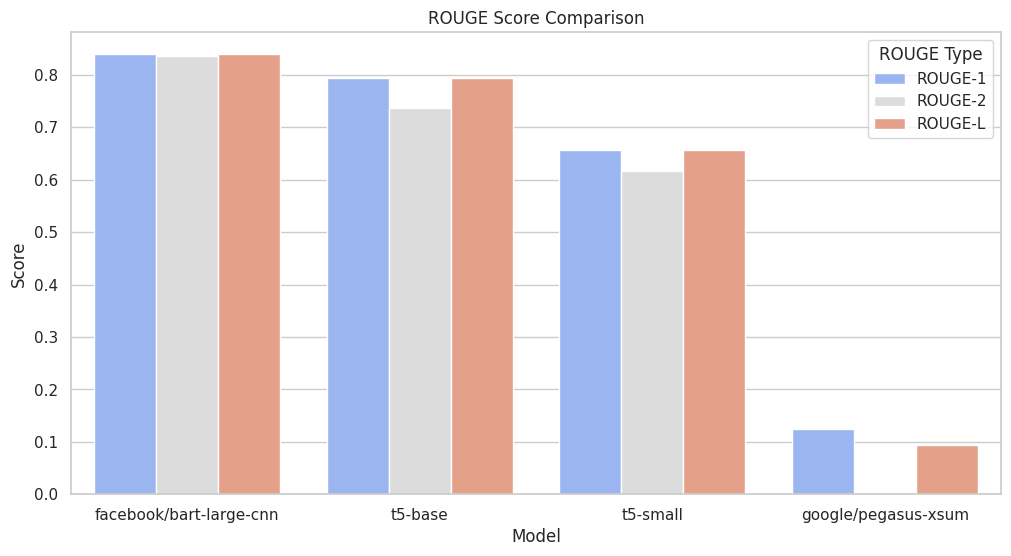

<ipython-input-11-65deecba6389>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Model"], y=df["Inference Time"], palette="coolwarm")


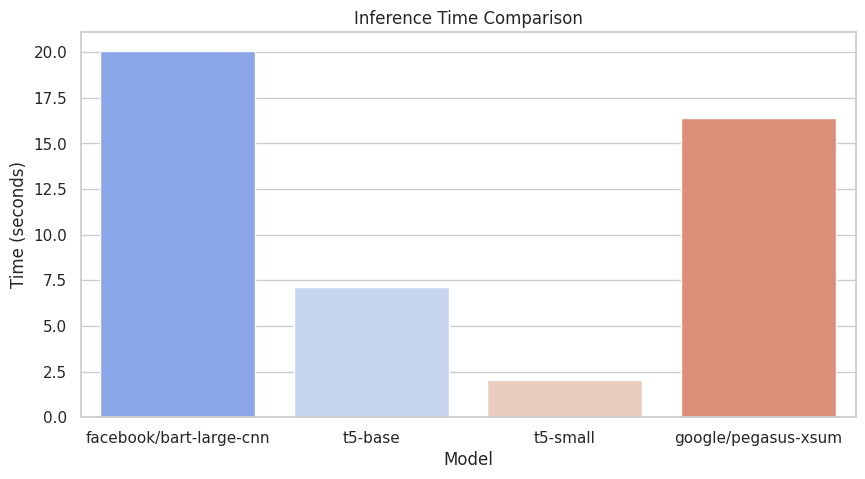

<ipython-input-11-65deecba6389>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Model"], y=df["TOPSIS Score"], palette="viridis")


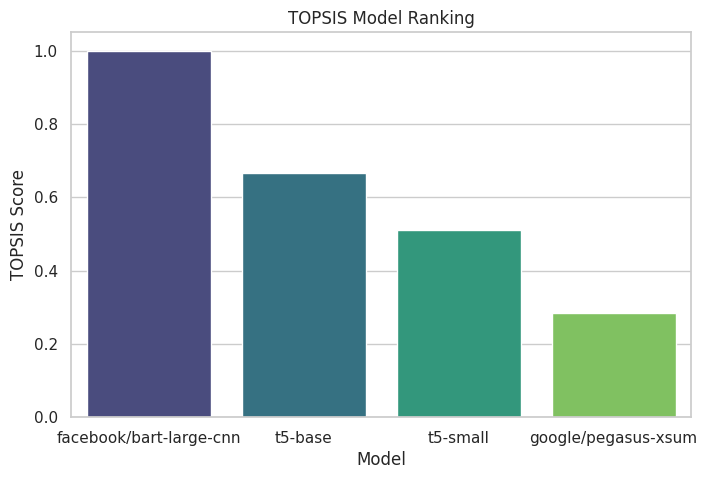

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# ROUGE Score Comparison
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Model"], value_vars=["ROUGE-1", "ROUGE-2", "ROUGE-L"], var_name="ROUGE Type", value_name="Score")
sns.barplot(data=df_melted, x="Model", y="Score", hue="ROUGE Type", palette="coolwarm")
plt.title("ROUGE Score Comparison")
plt.savefig("rouge_scores.png")
plt.show()

# Inference Time Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Model"], y=df["Inference Time"], palette="coolwarm")
plt.title("Inference Time Comparison")
plt.ylabel("Time (seconds)")
plt.savefig("inference_time.png")
plt.show()

# TOPSIS Score Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Model"], y=df["TOPSIS Score"], palette="viridis")
plt.title("TOPSIS Model Ranking")
plt.ylabel("TOPSIS Score")
plt.savefig("topsis_ranking.png")
plt.show()
